In [62]:
import xgi
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
data_folder = "data"
collection_name = "hyperbard"

df = pd.read_csv(f"../{data_folder}/hyperbard_data/metadata/playtypes.csv", header=9, delimiter=",")

In [59]:
play_type = df.set_index("play_name")["play_type"].to_dict()

In [60]:
collection = {}

for play in play_type:
    df = pd.read_csv(f"../{data_folder}/hyperbard_data/graphdata/{play}_hg-group-mw.edges.csv")
    H = xgi.Hypergraph()

    for row in df["onstage"]:
        edge = set()
        for item in row.split(" "):
            edge.add(item.split("#")[1].split("_")[0])
        H.add_edge(edge)

    act = df["act"].to_dict()
    scene = df["scene"].to_dict()
    n_tokens = df["n_tokens"].to_dict()
    n_lines = df["n_lines"].to_dict()

    H.set_edge_attributes(act, name="act")
    H.set_edge_attributes(scene, name="scene")
    H.set_edge_attributes(n_tokens, name="n_tokens")
    H.set_edge_attributes(n_lines, name="n_lines")
    H["play-type"] = play_type[play]

    collection[play] = H
    

/var/folders/18/v8kqhtv16cl5085d0dv0hj8c0000gn/T/ipykernel_95305/4220884344.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


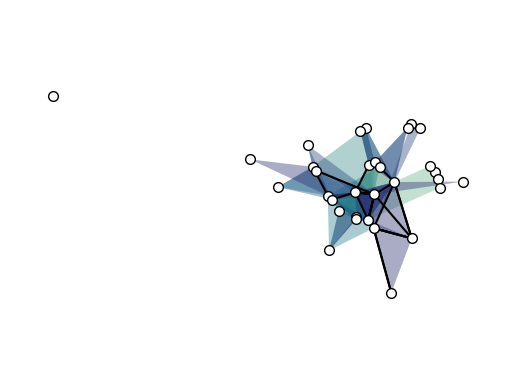

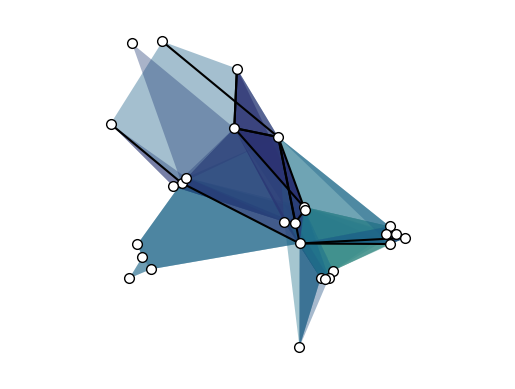

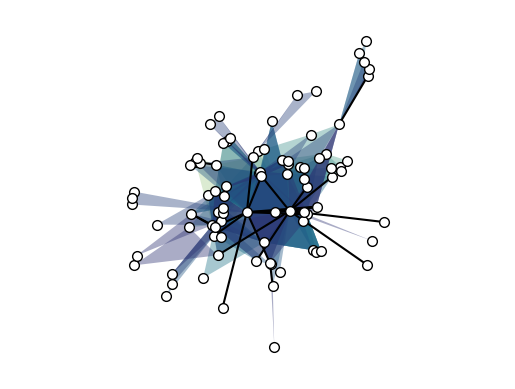

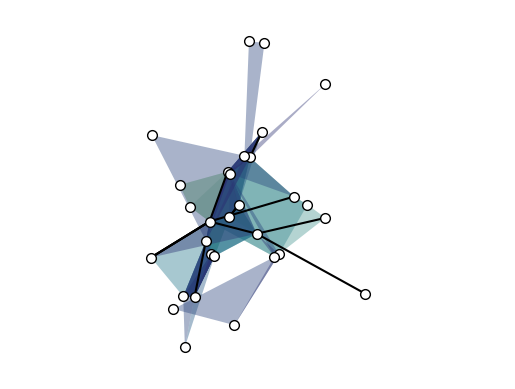

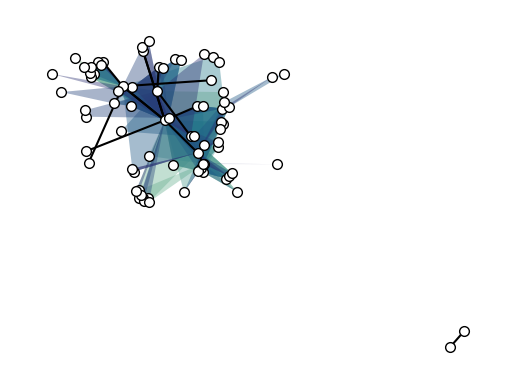

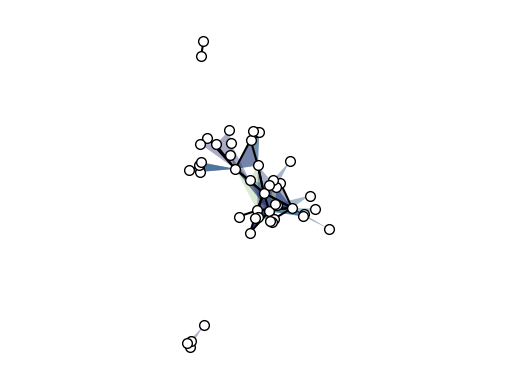

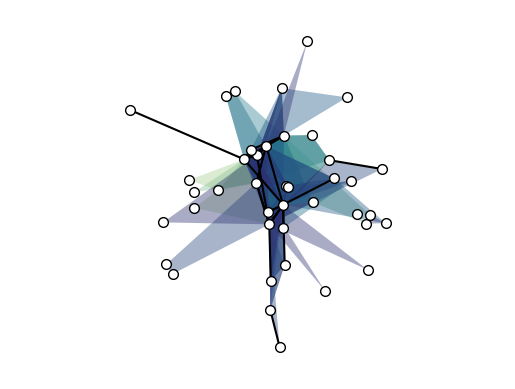

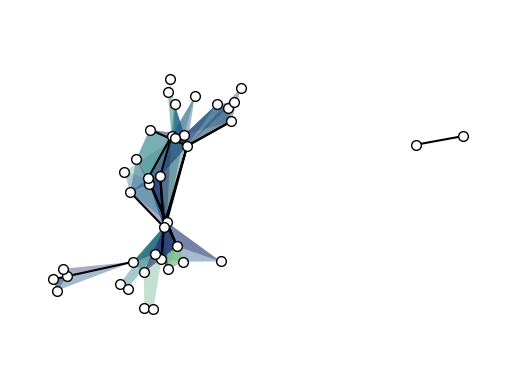

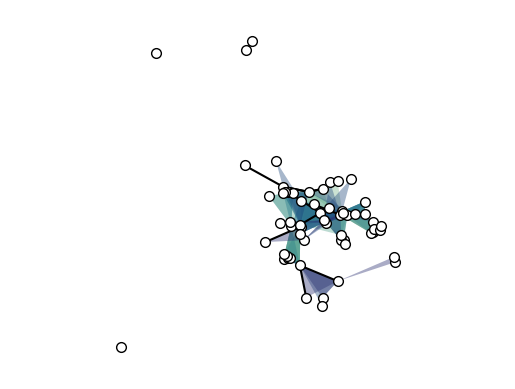

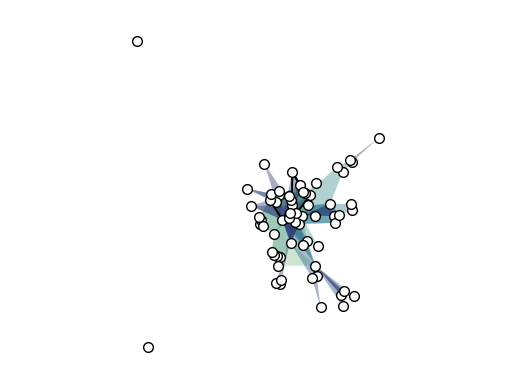

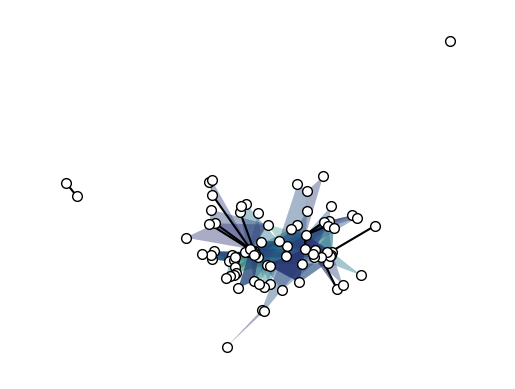

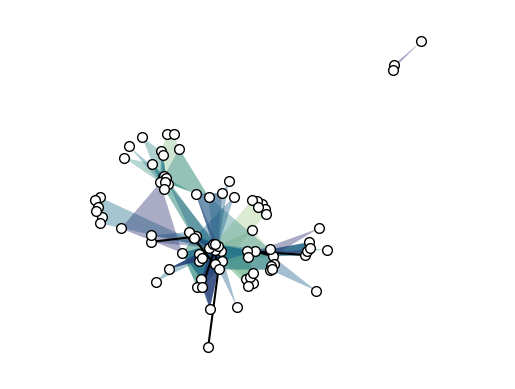

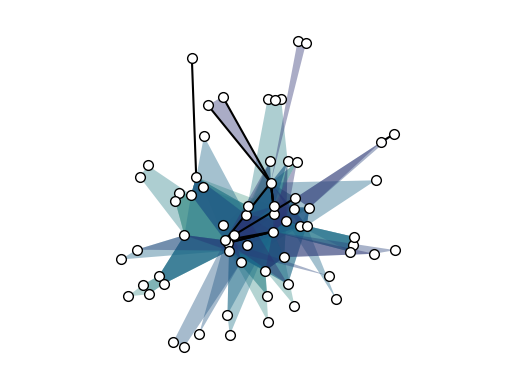

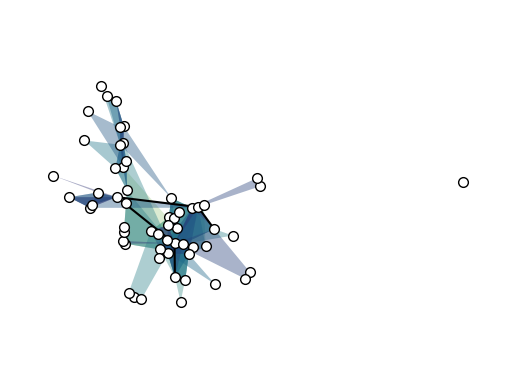

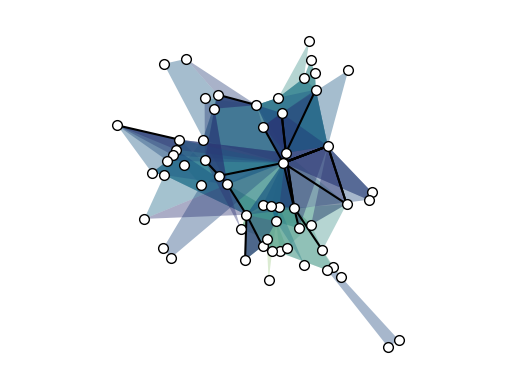

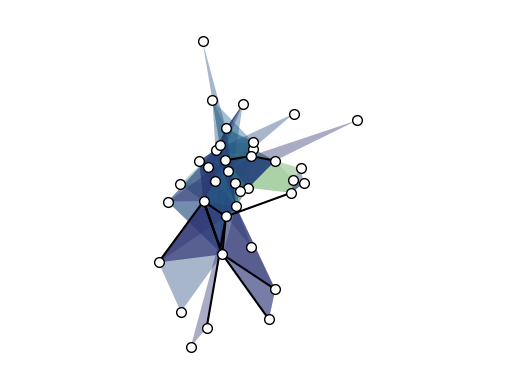

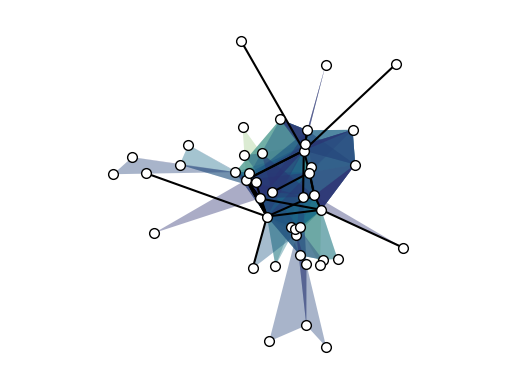

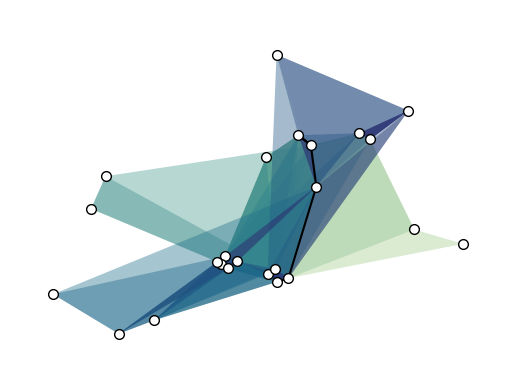

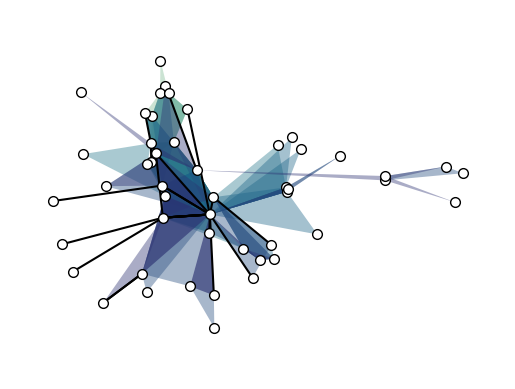

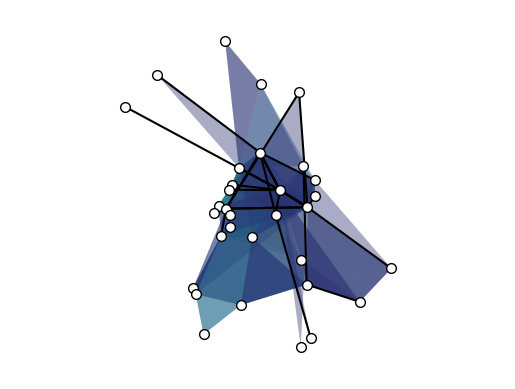

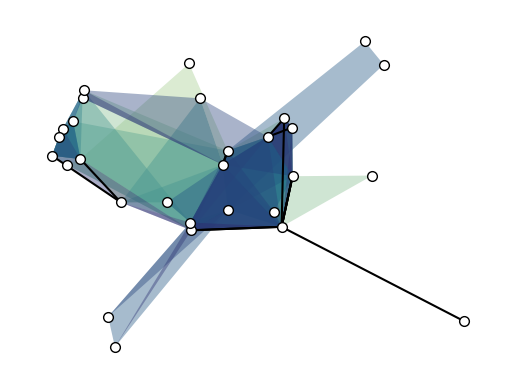

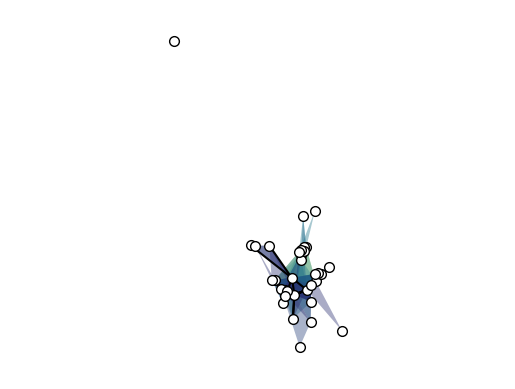

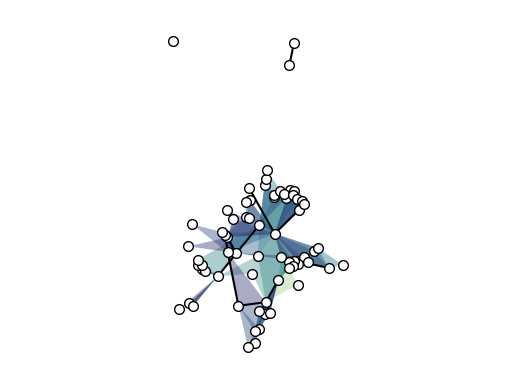

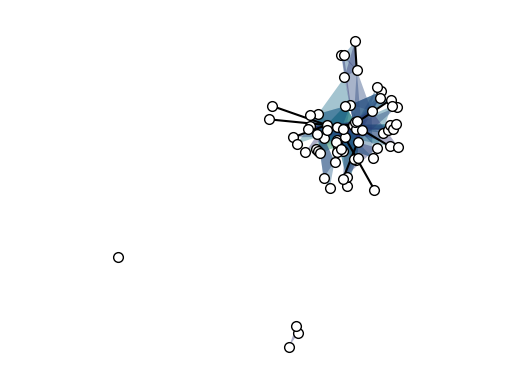

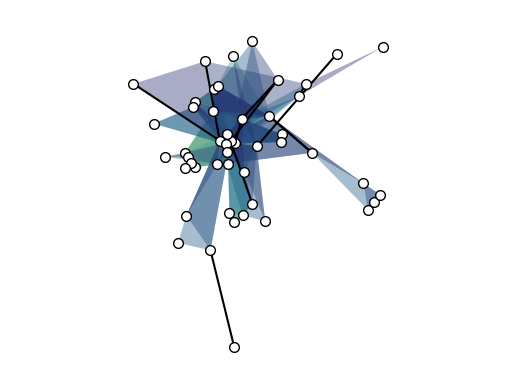

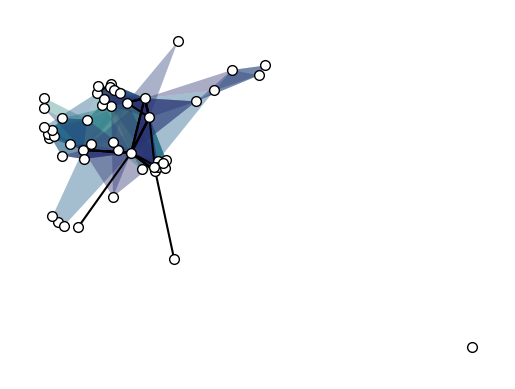

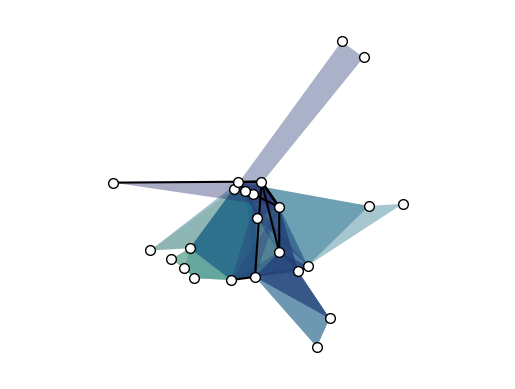

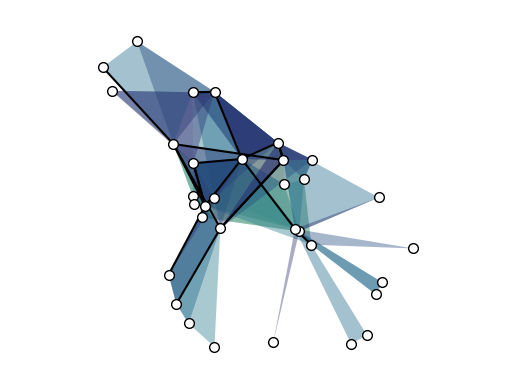

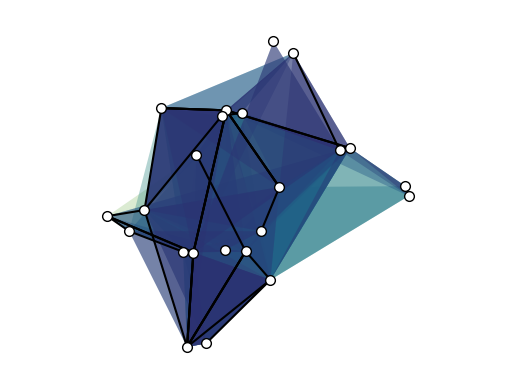

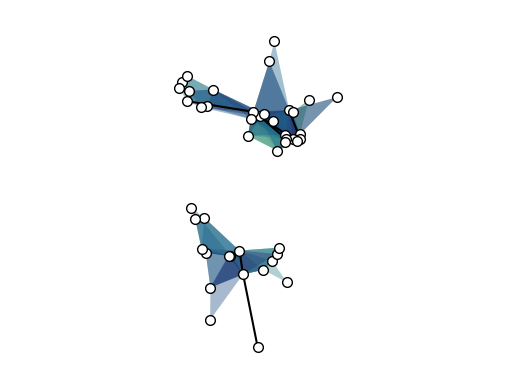

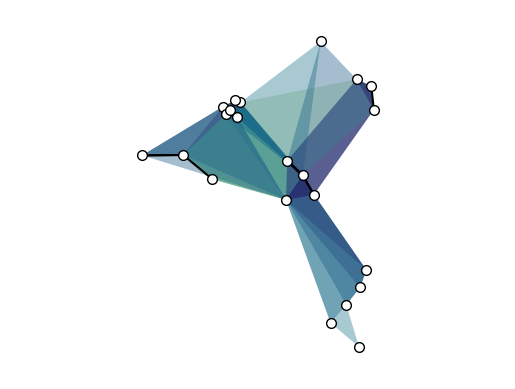

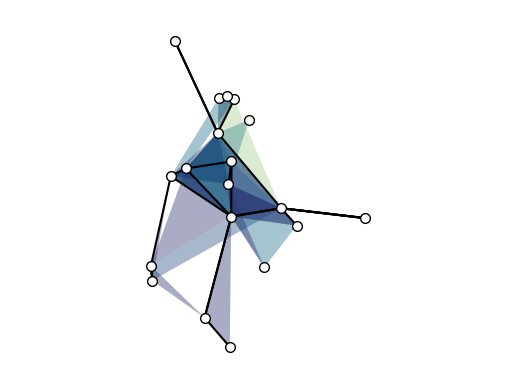

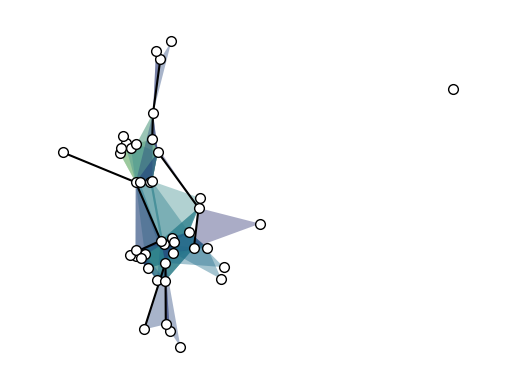

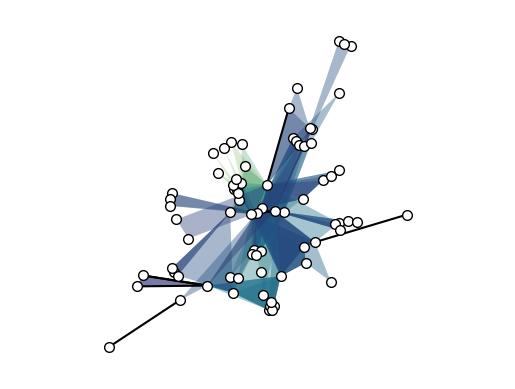

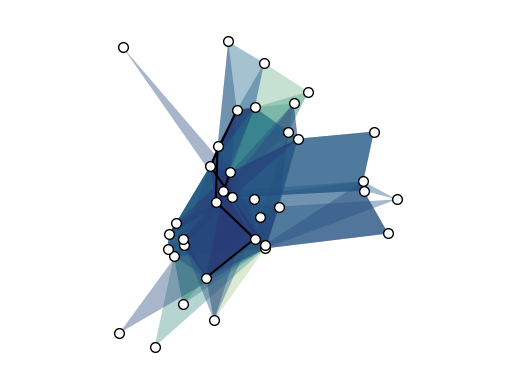

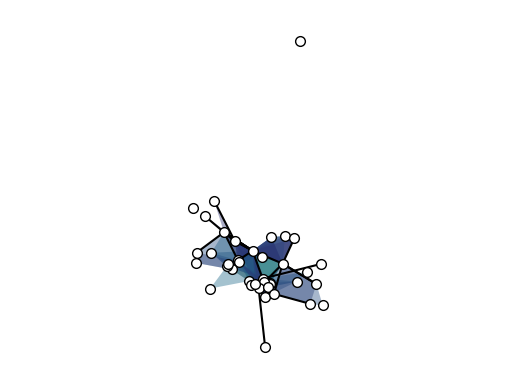

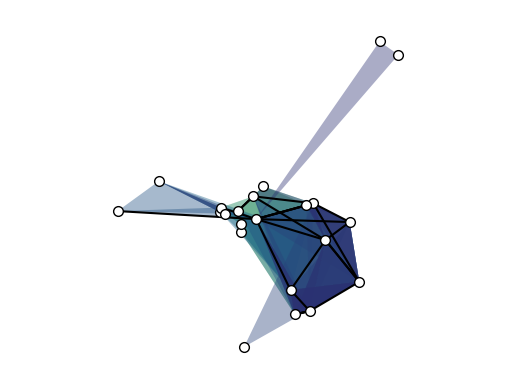

In [70]:
# assort = []
for name, H in collection.items():
    plt.figure()
    xgi.draw(H)
    # assort.append(xgi.degree_assortativity(H, exact=True))